In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data_path = "student_graduation_dataset.csv"
data = pd.read_csv(data_path)

## Basic description and statistics of the data

In [3]:
# Display the first few rows to understand the structure of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   student ID  registration_date  faculty_code  weighted_age  \
0       11616           20211231             6     -0.752817   
1       17441           20220831             9      0.285616   
2       20336           20220531             3     -0.017786   
3       25602           20211231             3      0.737241   
4       28137           20221031            15     -0.807477   

   days_of_loan_eligibility  weighted_household_income  student_gender  \
0                  0.586357                          8               1   
1                  0.586357                         11               1   
2                 -1.670845                         19               1   
3                  0.586357                         14               0   
4                  0.586357                         19               0   

   department_code  weighted_graduation_date  total_credit_hours  ...  \
0                4                 -1.501370                  59  ...   
1      

In [4]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student ID                         66 non-null     int64  
 1   registration_date                  66 non-null     int64  
 2   faculty_code                       66 non-null     int64  
 3   weighted_age                       66 non-null     float64
 4   days_of_loan_eligibility           66 non-null     float64
 5   weighted_household_income          66 non-null     int64  
 6   student_gender                     66 non-null     int64  
 7   department_code                    66 non-null     int64  
 8   weighted_graduation_date           66 non-null     float64
 9   total_credit_hours                 66 non-null     int64  
 10  student_ethnicity                  66 non-null     int64  
 11  non-graduation                     66 

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
student ID                           0
registration_date                    0
faculty_code                         0
weighted_age                         0
days_of_loan_eligibility             0
weighted_household_income            0
student_gender                       0
department_code                      0
weighted_graduation_date             0
total_credit_hours                   0
student_ethnicity                    0
non-graduation                       0
courses_available                    0
courses_registered                   0
course_registration_amt              0
course_code                          0
course_mask                          0
teacher_available                    0
teacher_days_of_teaching_a_course    0
teacher_approval_ratting             0
teacher_employment_date              0
teacher_reversed_course              0
teacher_mask                         0
dtype: int64


In [6]:
# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
          student ID  registration_date  faculty_code  weighted_age  \
count      66.000000       6.600000e+01     66.000000     66.000000   
mean    81022.287879       2.022364e+07     11.181818     -0.059466   
std     40279.311576       6.365220e+03      5.740300      0.661414   
min      1508.000000       2.021123e+07      1.000000     -1.004927   
25%     49968.000000       2.022056e+07      6.500000     -0.642655   
50%     78579.000000       2.022108e+07     10.500000     -0.112435   
75%    115680.750000       2.023051e+07     17.000000      0.298493   
max    148574.000000       2.023113e+07     20.000000      1.729381   

       days_of_loan_eligibility  weighted_household_income  student_gender  \
count                 66.000000                  66.000000       66.000000   
mean                   0.291458                  11.393939        0.469697   
std                    0.674889                   6.772975        0.502905   
min                   -2.0

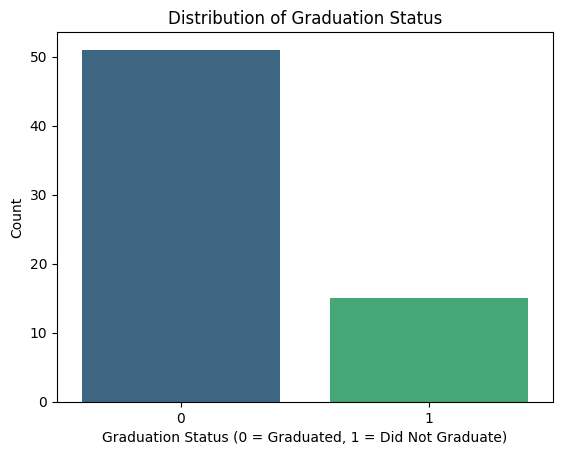

In [7]:
# Visualizing the target variable (non-graduation)
sns.countplot(x='non-graduation', data=data, palette='viridis')
plt.title("Distribution of Graduation Status")
plt.xlabel("Graduation Status (0 = Graduated, 1 = Did Not Graduate)")
plt.ylabel("Count")
plt.show()

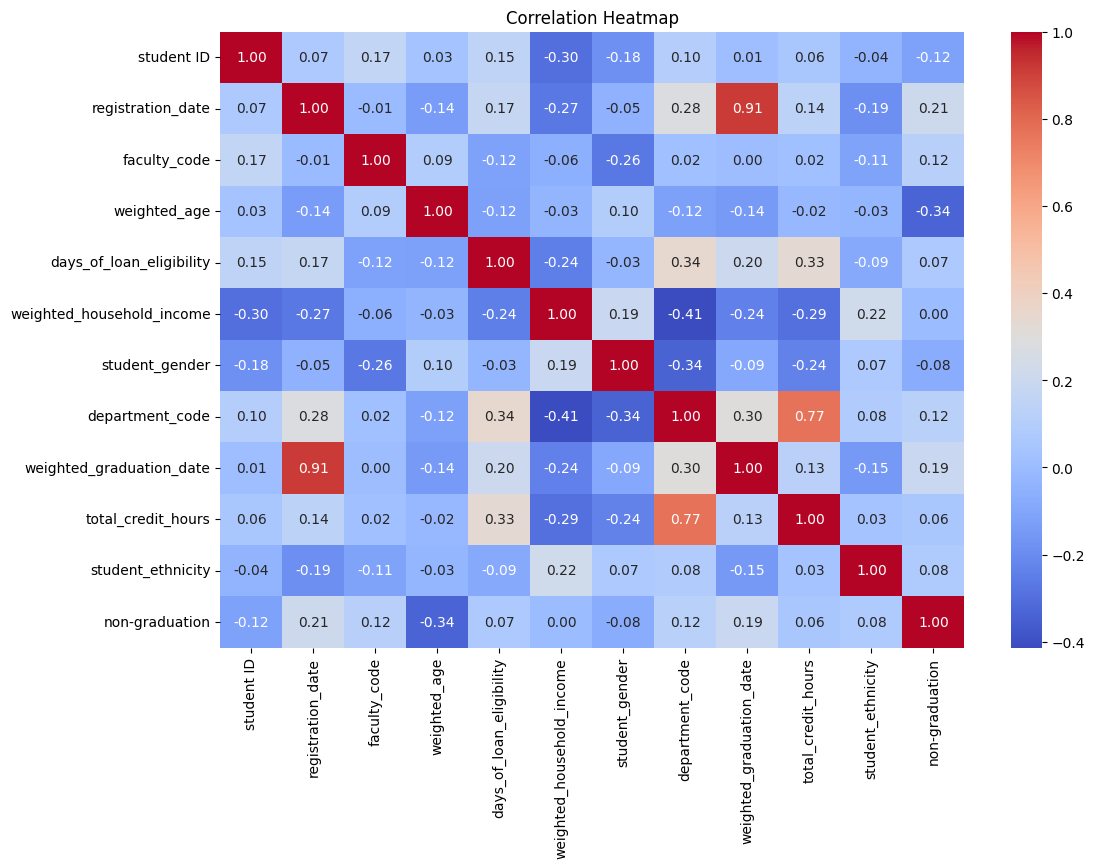

In [8]:
#Visualize the correlation heatmap
plt.figure(figsize=(12, 8))

#Select only numerical features for correlation calculation
import numpy as np
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### weighted_age (-0.34): Older students are having tough times to graduate.
### weighted_household_income (-0.24):  Lower-income students tend to have higher non-graduation rates.
### weighted_graduation_date (0.19): Students took  more time to fullfill their credits and graduate.
### total_credit_hours (0.06), student_gender (-0.08), student_ethnicity (0.08) has No strong impact on non-graduation

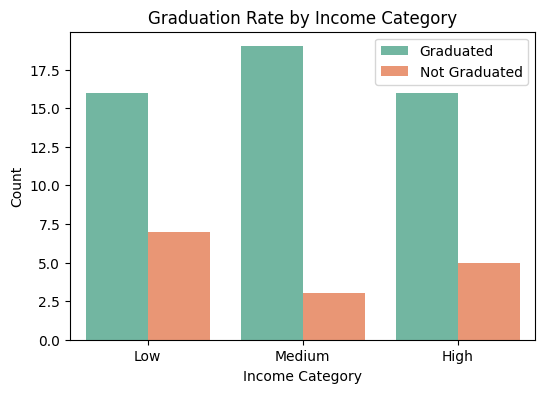

In [9]:
data['income_category'] = pd.qcut(data['weighted_household_income'], q=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(6,4))
sns.countplot(x=data['income_category'], hue=data['non-graduation'], palette='Set2')
plt.xlabel("Income Category")


plt.ylabel("Count")
plt.title("Graduation Rate by Income Category")
plt.legend(["Graduated", "Not Graduated"])
plt.show()

### The graduation rate varies across the income categories, Medium being the highest graduates and lower non-graduates. This suggests that moderate financial stability may provide better educational outcomes.

### The increased percentage of non-graduating students among low-income students suggests that financial difficulties may affect the continuation of study.

### Interestingly, compared to medium-income students, high-income students also had a somewhat higher non-graduation rate, indicating that variables other than financial stability affect graduation results.

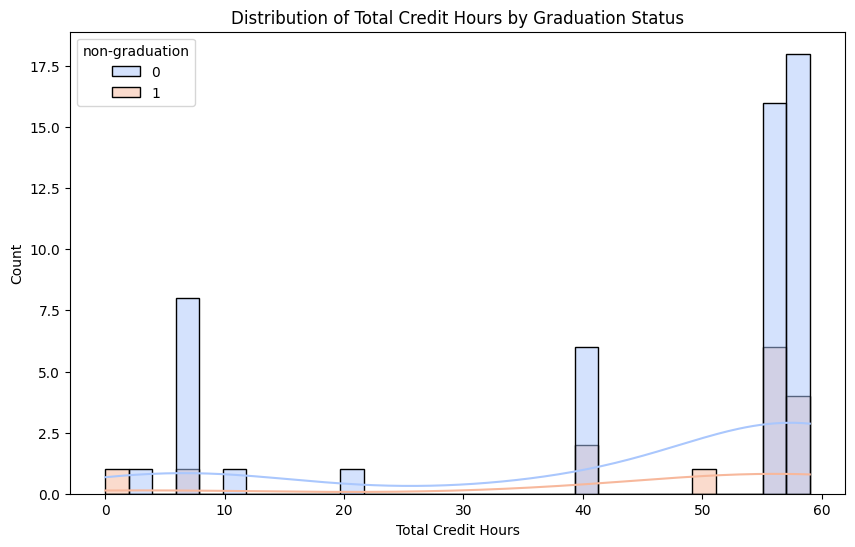

In [10]:
# Visualization: Distribution of Total Credit Hours for Graduated vs. Non-Graduated Students
plt.figure(figsize=(10, 6))
sns.histplot(data, x='total_credit_hours', hue='non-graduation', bins=30, kde=True, palette='coolwarm')
plt.title("Distribution of Total Credit Hours by Graduation Status")
plt.xlabel("Total Credit Hours")
plt.ylabel("Count")
plt.show()

## Visualizing less impact features 

## Bar Plot of Graduation status by Gender

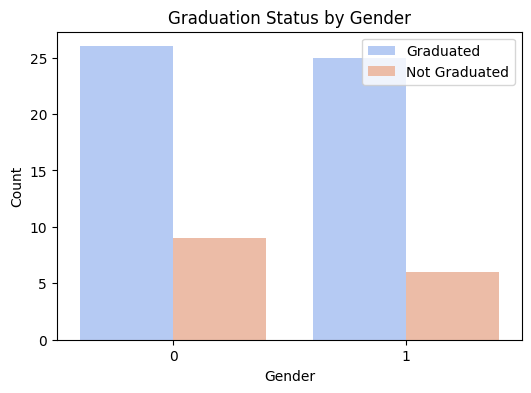

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['student_gender'], hue=data['non-graduation'], palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Graduation Status by Gender")
plt.legend(['Graduated', 'Not Graduated'])
plt.show()

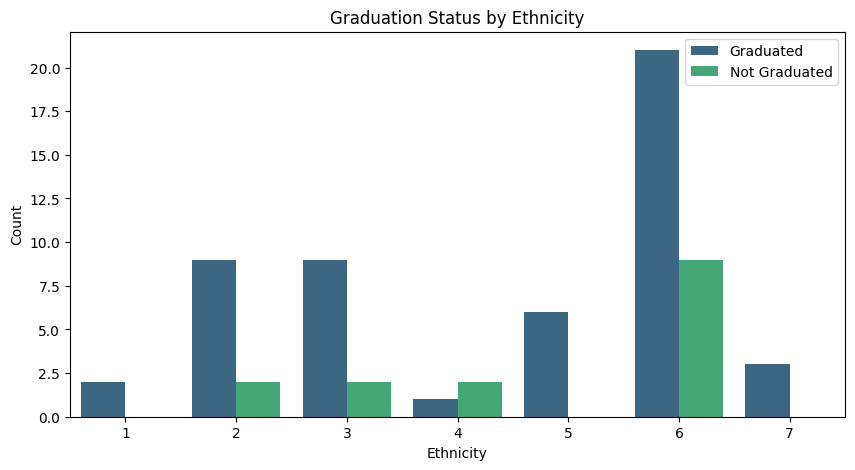

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['student_ethnicity'], hue=data['non-graduation'], palette='viridis')
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Graduation Status by Ethnicity")
plt.legend(['Graduated', 'Not Graduated'])
plt.show()

In [13]:
# As previously noted, gender does not appear to have a significant impact, as both males and females contribute equally to graduation and non-graduation rates. Similarly, to the Ethnicity as well. Because each ethnicity has similar grduation rate though few of them have 100% graduation rate.

## Sequential Data Visualizations 

In [14]:
sequential_columns = [
    "courses_available", "courses_registered", "course_registration_amt",
    "course_code", "course_mask", "teacher_available",
    "teacher_days_of_teaching_a_course", "teacher_approval_ratting",
    "teacher_employment_date", "teacher_reversed_course", "teacher_mask"
]

In [15]:
import ast

def parse_array_column(col):
    return data[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Apply this function to sequential columns
for col in sequential_columns:
    data[col] = parse_array_column(col)

In [16]:
data[sequential_columns].head(3)

courses_available  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                  courses_registered  \
0  [4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, ...   
1  [0, 3, 3, 3, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                             course_registration_amt  \
0  [0.026583405, -0.08245264, -0.067166016, 0, 0,...   
1  [0, -0.06596706, 0.016032634, -0.01765789, -0....   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                         course_code  \
0  [18948, 36795, 36795, 0, 0, 36569, 36569, 3656...   
1  [0, 6980, 6980, 6980, 6980, 4033, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                         course_mask  \
0  [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...   
1  [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                   teacher_available  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                   teacher_days_of_teaching_a_course  \
0  [0, 0, 0, 0.02649655, 0.02649655, 0, 0, 0, -0....   
1  [0.02649655, 0, 0, 0, 0, 0, 0.02649655, 0.0264...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                            teacher_approval_ratting  \
0  [0, 0, 0, 335, 331, 0, 0, 0, 14, 371, 0, 14, 0...   
1  [481, 0, 0, 0, 0, 0, 481, 486, 486, 486, 481, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                             teacher_employment_date  \
0  [0, 0, 0, 1.2174772, 1.2174772, 0, 0, 0, 1.082...   
1  [0.8890216, 0, 0, 0, 0, 0, 0.29007298, 0.29007...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                             teacher_reversed_course  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                        teacher_mask  
0  [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, ...  
1  [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...

In [17]:
data["sequence_lengths"] = data["courses_available"].apply(len)
print(data["sequence_lengths"].value_counts())

sequence_lengths
512    66
Name: count, dtype: int64


In [18]:
#Convert course codes to categorical labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["course_code"] = data["course_code"].apply(lambda x: label_encoder.fit_transform(x))
data["course_code"]

0     [1, 3, 3, 0, 0, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, ...
1     [0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 1, 1, 2, 1, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, ...
                            ...                        
61    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
62    [2, 2, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, ...
63    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
65    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: course_code, Length: 66, dtype: object

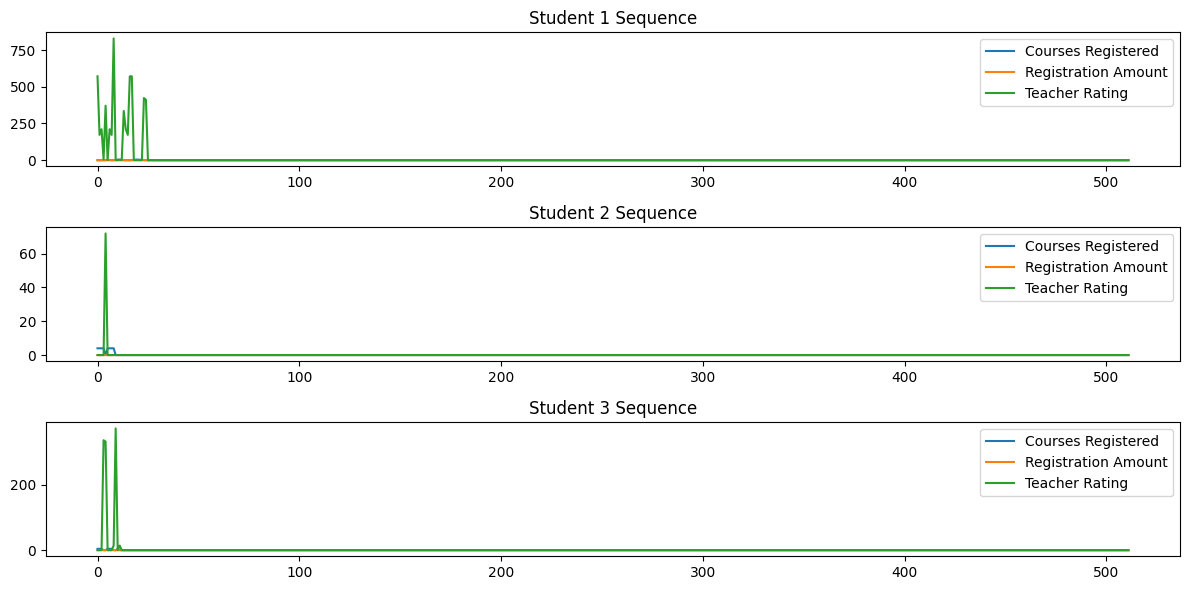

In [19]:
sample_students = data.sample(3, random_state=42)

#Plot the sequences for each selected student
fig, axes = plt.subplots(len(sample_students), 1, figsize=(12, 6))

for i, (_, student) in enumerate(sample_students.iterrows()):
    axes[i].plot(student["courses_registered"], label="Courses Registered")
    axes[i].plot(student["course_registration_amt"], label="Registration Amount")
    axes[i].plot(student["teacher_approval_ratting"], label="Teacher Rating")
    axes[i].set_title(f"Student {i+1} Sequence")
    axes[i].legend()

plt.tight_layout()
plt.show()

### Closer look of the plot

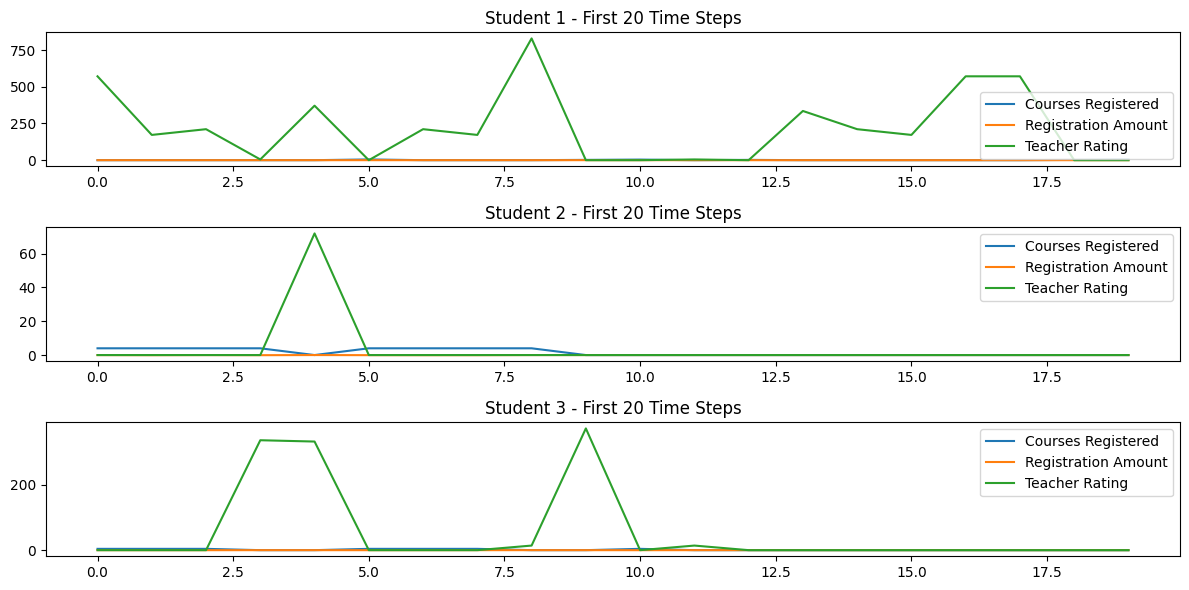

In [20]:
sample_students = data.sample(3, random_state=42)

#Create subplots
fig, axes = plt.subplots(len(sample_students), 1, figsize=(12, 6))

for i, (_, student) in enumerate(sample_students.iterrows()):
    axes[i].plot(student["courses_registered"][:20], label="Courses Registered")
    axes[i].plot(student["course_registration_amt"][:20], label="Registration Amount")
    axes[i].plot(student["teacher_approval_ratting"][:20], label="Teacher Rating")

    axes[i].set_title(f"Student {i+1} - First 20 Time Steps")
    axes[i].legend()

plt.tight_layout()
plt.show()

### Multi-Line Time Series Plot of Courses registered for all 66 students

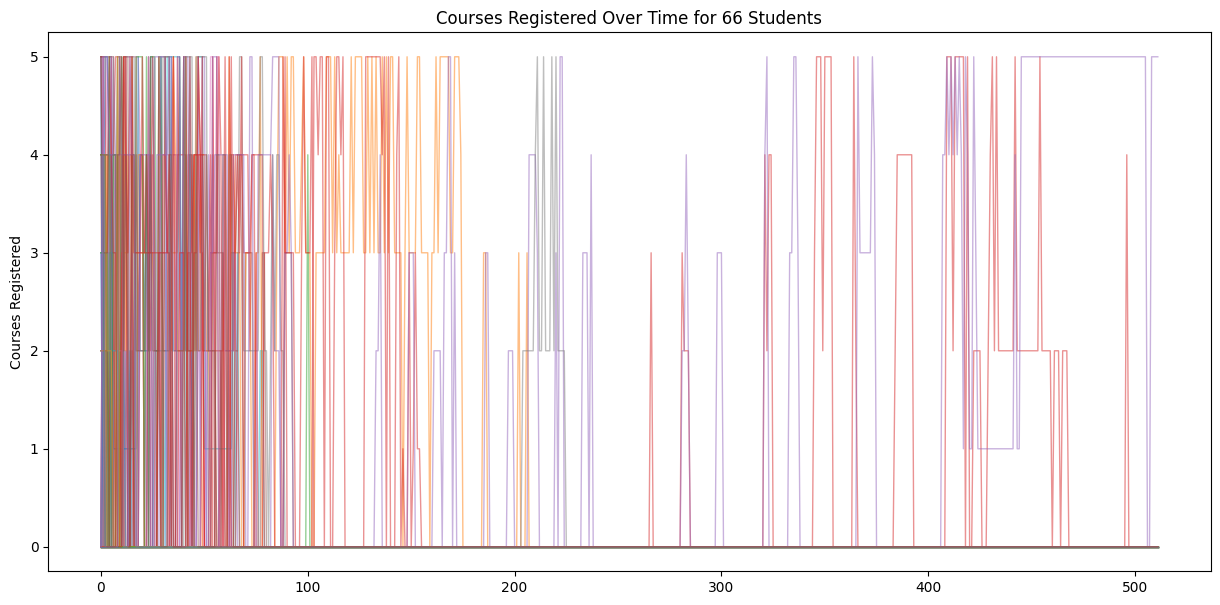

In [21]:
sample_students = data.sample(66, random_state=42)
sequences = np.array(sample_students["courses_registered"].tolist())

plt.figure(figsize=(15, 7))

#each student's sequence
for i in range(len(sequences)):
    plt.plot(range(512), sequences[i], alpha=0.5, linewidth=1)

plt.ylabel("Courses Registered")
plt.title("Courses Registered Over Time for 66 Students")
plt.show()

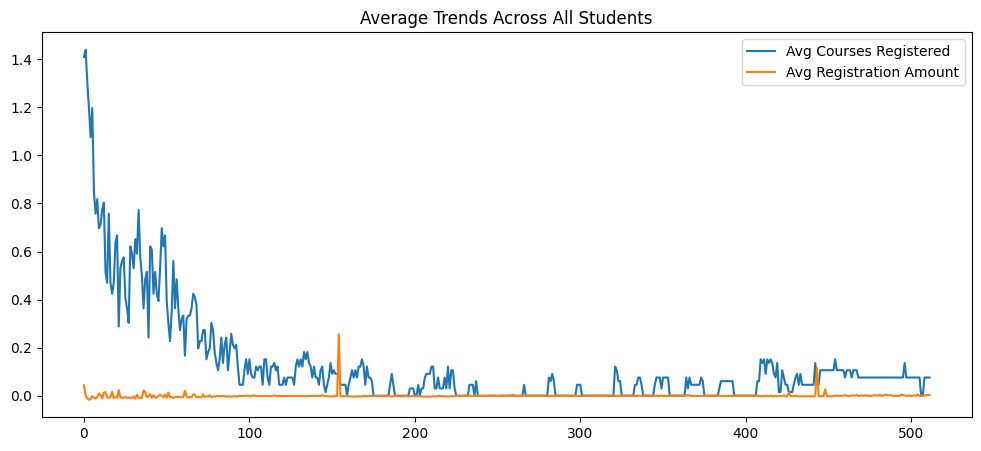

In [22]:
# Compute the mean sequence for the dataset
mean_courses_registered = np.mean(data["courses_registered"].tolist(), axis=0)
mean_registration_amt = np.mean(data["course_registration_amt"].tolist(), axis=0)

# Plot the average trends
plt.figure(figsize=(12, 5))
plt.plot(mean_courses_registered, label="Avg Courses Registered")
plt.plot(mean_registration_amt, label="Avg Registration Amount")
plt.title("Average Trends Across All Students")
plt.legend()
plt.show()


## Balancing the non-graduation column

In [23]:
data.head()

student ID  registration_date  faculty_code  weighted_age  \
0       11616           20211231             6     -0.752817   
1       17441           20220831             9      0.285616   
2       20336           20220531             3     -0.017786   
3       25602           20211231             3      0.737241   
4       28137           20221031            15     -0.807477   

   days_of_loan_eligibility  weighted_household_income  student_gender  \
0                  0.586357                          8               1   
1                  0.586357                         11               1   
2                 -1.670845                         19               1   
3                  0.586357                         14               0   
4                  0.586357                         19               0   

   department_code  weighted_graduation_date  total_credit_hours  ...  \
0                4                 -1.501370                  59  ...   
1                4                 -0.835616                  41  ...   
2                1                 -1.087671                   6  ...   
3                4                 -1.501370                  57  ...   
4                4                 -0.668493                  57  ...   

                                         course_code  \
0  [1, 3, 3, 0, 0, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, ...   
1  [0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 1, 1, 2, 1, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, ...   

                                         course_mask  \
0  [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...   
1  [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...   

                                   teacher_available  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                   teacher_days_of_teaching_a_course  \
0  [0, 0, 0, 0.02649655, 0.02649655, 0, 0, 0, -0....   
1  [0.02649655, 0, 0, 0, 0, 0, 0.02649655, 0.0264...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0.02649655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                            teacher_approval_ratting  \
0  [0, 0, 0, 335, 331, 0, 0, 0, 14, 371, 0, 14, 0...   
1  [481, 0, 0, 0, 0, 0, 481, 486, 486, 486, 481, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                             teacher_employment_date  \
0  [0, 0, 0, 1.2174772, 1.2174772, 0, 0, 0, 1.082...   
1  [0.8890216, 0, 0, 0, 0, 0, 0.29007298, 0.29007...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [1.5942352, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                             teacher_reversed_course  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                        teacher_mask income_category  \
0  [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, ...          Medium   
1  [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          Medium   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...            High   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...          Medium   
4  [0, 1, 1, 1,

In [24]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data["non-graduation"] == 0]
df_minority = data[data["non-graduation"] == 1]

# Oversample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Reproducibility

# Combine majority and upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
balanced_class_distribution = df_balanced["non-graduation"].value_counts()
balanced_class_distribution

non-graduation
0    51
1    51
Name: count, dtype: int64

In [25]:
data=df_balanced

In [26]:
data

student ID  registration_date  faculty_code  weighted_age  \
0         95184           20230430            18      1.312530   
1         53438           20220531             2     -0.650995   
2         70650           20230331            18     -0.219800   
3        143898           20220831             9     -0.119934   
4        133278           20220228             5      0.779622   
..          ...                ...           ...           ...   
97        90756           20230430            19     -0.914407   
98        64727           20230331            10      0.010577   
99        52240           20220131            16      0.306915   
100       90756           20230430            19     -0.914407   
101       70650           20230331            18     -0.219800   

     days_of_loan_eligibility  weighted_household_income  student_gender  \
0                    0.586357                          0               1   
1                    0.586357                          7               1   
2                    0.586357                          5               0   
3                    0.586357                          3               0   
4                    0.586357                         12               1   
..                        ...                        ...             ...   
97                   0.586357                         19               0   
98                  -2.096581                         19               1   
99                   0.361440                         19               1   
100                  0.586357                         19               0   
101                  0.586357                          5               0   

     department_code  weighted_graduation_date  total_credit_hours  ...  \
0                  5                 -0.172603                  59  ...   
1                  4                 -1.087671                  57  ...   
2                  4                 -0.254794                  57  ...   
3                  4                 -0.835616                  10  ...   
4                  3                 -1.339726                  59  ...   
..               ...                       ...                 ...  ...   
97                 4                 -0.172603                  57  ...   
98                 4                 -0.254794                  41  ...   
99                 1                 -1.416438                   6  ...   
100                4                 -0.172603                  57  ...   
101                4                 -0.254794                  57  ...   

                                           course_code  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 12, 2, 11, 0, 0, 10, 10, 0, 10, 10, ...   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...   
4    [0, 9, 9, 9, 3, 3, 3, 3, 3, 3, 2, 13, 2, 2, 2,...   
..                                                 ...   
97   [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
99   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
100  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
101  [0, 0, 0, 12, 2, 11, 0, 0, 10, 10, 0, 10, 10, ...   

                                           course_mask  \
0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1    [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2    [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, ...   
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...   
4    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                 ...   
97   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
98   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
99   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
100  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
101  [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, ...   

    

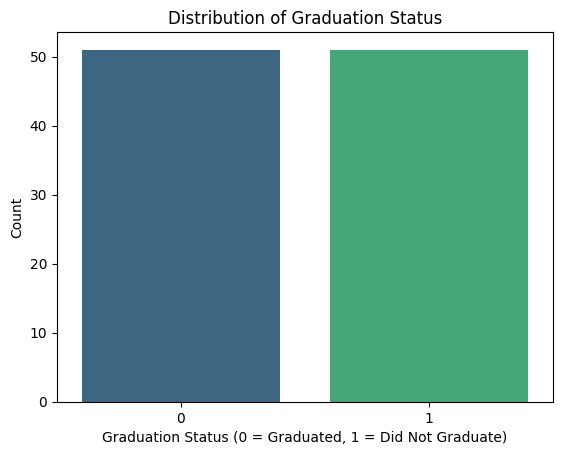

In [27]:
# Visualizing the target variable (non-graduation)
sns.countplot(x='non-graduation', data=data, palette='viridis')
plt.title("Distribution of Graduation Status")
plt.xlabel("Graduation Status (0 = Graduated, 1 = Did Not Graduate)")
plt.ylabel("Count")
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   student ID                         102 non-null    int64   
 1   registration_date                  102 non-null    int64   
 2   faculty_code                       102 non-null    int64   
 3   weighted_age                       102 non-null    float64 
 4   days_of_loan_eligibility           102 non-null    float64 
 5   weighted_household_income          102 non-null    int64   
 6   student_gender                     102 non-null    int64   
 7   department_code                    102 non-null    int64   
 8   weighted_graduation_date           102 non-null    float64 
 9   total_credit_hours                 102 non-null    int64   
 10  student_ethnicity                  102 non-null    int64   
 11  non-graduation                     102 non-nu

## Feature Engineering

In [29]:
# Feature Engineering
# Identify static categorical and numerical columns
categorical_features = ['faculty_code', 'student_gender', 'department_code', 'student_ethnicity']
numerical_features = ['weighted_age', 'days_of_loan_eligibility', 'weighted_household_income',
                      'total_credit_hours']

target_column = 'non-graduation'

# Sequential features (list-like columns)
sequential_features = ['courses_registered', 'course_registration_amt', 'teacher_days_of_teaching_a_course',
                       'teacher_approval_ratting', 'teacher_available', 'courses_available', 'teacher_mask',
                       'teacher_reversed_course', 'course_mask', 'teacher_employment_date', 'course_code']


In [30]:
# Ensure all sequential columns are properly parsed
def parse_column(column):
    return column.apply(lambda x: eval(x) if isinstance(x, str) else x)

for col in sequential_features:
    data[col] = parse_column(data[col])

In [31]:
# Pad sequential data to ensure equal sequence lengths
max_sequence_length = len(data['courses_available'])  # Define a maximum length for sequences
def process_sequential_features(data, columns, max_len):
    padded_sequences = {}
    for col in columns:
        sequences = data[col].apply(lambda x: x if isinstance(x, list) else [0])  # Ensure lists
        padded_sequences[col] = pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')
    return padded_sequences

padded_sequential_data = process_sequential_features(data, sequential_features, max_sequence_length)


In [32]:
# Combine static features and sequential data for preprocessing
# One-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

In [33]:
# Prepare the static features (X_static) and target (y)
X_static = data.drop(columns=[target_column, 'student ID', 'registration_date', 'weighted_graduation_date'] + sequential_features)
y = data[target_column]

In [34]:
# Apply transformations to static features
try:
    X_static_transformed = preprocessor.fit_transform(X_static)
    feature_names_static = preprocessor.get_feature_names_out()

except ValueError as e:
    print("Error transforming categorical or numerical data:", e)
    print("Ensure all categorical columns contain valid, non-list data.")
    raise

In [35]:
# Verify the transformed static dataset shape
print("\nStatic Feature Matrix Shape:", X_static_transformed.shape)


Static Feature Matrix Shape: (102, 33)


In [36]:
X_static_transformed

<102x33 sparse matrix of type '<class 'numpy.float64'>'
	with 753 stored elements in Compressed Sparse Row format>

In [37]:
# Convert padded sequential data into arrays
X_sequential = np.hstack([padded_sequential_data[col] for col in sequential_features if col in padded_sequential_data])
print("\nSequential Feature Matrix Shape:", X_sequential.shape)


Sequential Feature Matrix Shape: (102, 1122)


In [38]:
X_sequential

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
# Reshape X_static_transformed to have 2 dimensions if necessary
X_static_transformed = X_static_transformed.toarray()  # Convert to a dense NumPy array

# Combine static and sequential data for modeling
X_combined = np.hstack([X_static_transformed, X_sequential])
print("\nCombined Feature Matrix Shape:", X_combined.shape)


Combined Feature Matrix Shape: (102, 1155)


In [40]:
# Save the prepared features and target for model building
np.save('X_static_transformed.npy', X_static_transformed)
np.save('X_sequential.npy', X_sequential)
np.save('X_combined.npy', X_combined)
pd.DataFrame(y).to_csv('y_target.csv', index=False)

In [41]:
# Save feature names for SHAP analysis
feature_names_sequential = [f"{col}_{i}" for col in sequential_features for i in range(max_sequence_length)]
feature_names = list(feature_names_static) + feature_names_sequential
pd.DataFrame(feature_names, columns=['feature_names']).to_csv('feature_names.csv', index=False)

print("\nEDA, Sequential Feature Processing, and Feature Preparation Completed! Feature names saved. Ready for Model Building.")



EDA, Sequential Feature Processing, and Feature Preparation Completed! Feature names saved. Ready for Model Building.


**Sequential Feature Processing, and Feature Preparation Completed! Ready for Model Building.**

*Let's consider Vanilla Transformer and Tabnet Transfomer for comparision*

In [42]:
# !pip install pytorch_lightning pytorch_tabnet seaborn

In [43]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import pandas as pd
from pytorch_tabnet.tab_network import TabNetNoEmbeddings

In [44]:
class StudentDataset(Dataset):
    def __init__(self, X, y):
        # Reshape X to include a sequence dimension if it's not present
        if len(X.shape) == 2:
            # Add a sequence dimension of length 1
            X = X.reshape(X.shape[0], 1, X.shape[1])
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [45]:
class VanillaTransformer(pl.LightningModule):
    def __init__(self, input_dim, d_model=64, num_heads=4, num_layers=2, dropout=0.1):
        """
        Args:
            input_dim: Number of input features
            d_model: Dimension of the model's internal representations
            num_heads: Number of attention heads
            num_layers: Number of transformer layers
            dropout: Dropout rate
        """
        super().__init__()
        self.save_hyperparameters()

        # Project input features to d_model dimensions
        self.input_projection = nn.Linear(input_dim, d_model)

        # Position encoding (optional for single timestep)
        self.pos_encoder = nn.Dropout(dropout)  # Using dropout instead of positional encoding for single timestep

        # Transformer layers
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)

        # Project input to d_model dimensions
        x = self.input_projection(x)
        # x shape: (batch_size, seq_len, d_model)

        # Apply position encoding/dropout
        x = self.pos_encoder(x)

        # Pass through transformer
        x = self.transformer(x)
        # x shape: (batch_size, seq_len, d_model)

        # Global average pooling over sequence dimension
        x = x.mean(dim=1)
        # x shape: (batch_size, d_model)

        # Classification
        return self.classifier(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).view(-1)
        loss = nn.BCELoss()(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).view(-1)
        loss = nn.BCELoss()(y_hat, y)
        self.log('val_loss', loss)
        return {'val_loss': loss, 'y_true': y, 'y_pred': y_hat}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [46]:
class TabNetTransformer(pl.LightningModule):
    def __init__(self, input_dim):
        """
        TabNet implementation for classification.

        Args:
            input_dim: Number of input features
        """
        super().__init__()
        self.save_hyperparameters()

        # Reshape layer to handle sequence input
        self.reshape = lambda x: x.view(x.shape[0], -1) if len(x.shape) > 2 else x

        # Initialize TabNet with smaller dimensions for better stability
        self.tabnet = TabNetNoEmbeddings(
            input_dim=input_dim,
            output_dim=1,
            n_d=16,          # Reduced feature transformer dimension
            n_a=16,          # Reduced attention dimension
            n_steps=3,       # Number of decision steps
            gamma=1.3,       # Scaling factor for attention
            n_independent=1,  # Number of independent GLU layers
            n_shared=1,      # Number of shared GLU layers
            momentum=0.3,    # Feature selection momentum
            mask_type='sparsemax'  # Type of mask to use
        )

    def forward(self, x):
        """
        Forward pass through the model.

        Args:
            x: Input tensor of shape (batch_size, seq_len, features) or (batch_size, features)

        Returns:
            torch.Tensor: Predicted probabilities
        """
        x = self.reshape(x)
        # TabNet returns (predictions, attention_masks)
        # We only need the predictions for our binary classification
        output, _ = self.tabnet(x)
        return torch.sigmoid(output)

    def training_step(self, batch, batch_idx):
        """
        Training step.

        Args:
            batch: Tuple of (inputs, targets)
            batch_idx: Index of the current batch

        Returns:
            torch.Tensor: Computed loss
        """
        x, y = batch
        y_hat = self(x).view(-1)
        loss = nn.BCELoss()(y_hat, y)

        # Log training metrics
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        """
        Validation step.

        Args:
            batch: Tuple of (inputs, targets)
            batch_idx: Index of the current batch

        Returns:
            dict: Dictionary containing validation metrics
        """
        x, y = batch
        y_hat = self(x).view(-1)
        loss = nn.BCELoss()(y_hat, y)

        # Log validation metrics
        self.log('val_loss', loss)
        return {'val_loss': loss, 'y_true': y, 'y_pred': y_hat}

    def configure_optimizers(self):
        """
        Configure the optimizer for training.

        Returns:
            torch.optim.Optimizer: The configured optimizer
        """
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [47]:
def train_and_evaluate_model(model, train_loader, val_loader, test_loader):
    trainer = pl.Trainer(
        max_epochs=50,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
        accelerator='cpu',  # Explicitly set to CPU
        devices=1
    )

    trainer.fit(model, train_loader, val_loader)

    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X, y in test_loader:
            outputs = model(X).view(-1)
            y_true.extend(y.numpy())
            y_pred.extend(outputs.numpy())

    y_pred_binary = (np.array(y_pred) > 0.5).astype(int)

    metrics = {
        'accuracy': accuracy_score(y_true, y_pred_binary),
        'precision': precision_score(y_true, y_pred_binary),
        'recall': recall_score(y_true, y_pred_binary),
        'f1': f1_score(y_true, y_pred_binary),
        'auc_roc': roc_auc_score(y_true, y_pred)
    }

    return metrics


In [48]:
def main():
    # Load the data
    print("Loading data...")
    X = np.load('X_combined.npy')
    y = pd.read_csv('y_target.csv')['non-graduation'].values # Read the 'non-graduation' column and get its values as a NumPy array

    # Get input dimension
    input_dim = X.shape[1]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Create dataloaders with smaller batch size
    train_dataset = StudentDataset(X_train, y_train)
    val_dataset = StudentDataset(X_val, y_val)
    test_dataset = StudentDataset(X_test, y_test)

    batch_size = 16  # Reduced batch size

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize models with proper input dimensions
    print(f"Input dimension: {input_dim}")

    # Vanilla Transformer with reduced complexity
    vanilla_transformer = VanillaTransformer(
        input_dim=input_dim,
        d_model=64,  # Reduced from previous version
        num_heads=4,
        num_layers=2,
        dropout=0.1
    )
    print("Training Vanilla Transformer...")
    vanilla_metrics = train_and_evaluate_model(
        vanilla_transformer, train_loader, val_loader, test_loader
    )

    # TabNet Transformer
    tabnet_transformer = TabNetTransformer(input_dim=input_dim)
    print("Training TabNet Transformer...")
    tabnet_metrics = train_and_evaluate_model(
        tabnet_transformer, train_loader, val_loader, test_loader
    )

    # Compare results
    results_df = pd.DataFrame({
        'Vanilla Transformer': vanilla_metrics,
        'TabNet Transformer': tabnet_metrics
    })

    print("\nModel Comparison:")
    print(results_df)

    return results_df

In [49]:
if __name__ == "__main__":
    results = main()

Loading data...
Input dimension: 1155
Training Vanilla Transformer...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type               | Params | Mode 
----------------------------------------------------------------
0 | input_projection | Linear             | 74.0 K | train
1 | pos_encoder      | Dropout            | 0      | train
2 | transformer      | TransformerEncoder | 562 K  | train
3 | classifier       | Sequential         | 2.1 K  | train
----------------------------------------------------------------
638 K     Trainable params
0         Non-trainable params
638 K     Total params
2.554     Total estimated model params size (MB)
30        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name   | Type               | Params | Mode 
------------------------------------------------------
0 | tabnet | TabNetNoEmbeddings | 150 K  | train
------------------------------------------------------
150 K     Trainable params
0         Non-trainable params
150 K     Total params
0.601     Total estimated model params size (MB)
72        Modules in train mode
0         Modules in eval mode


Training TabNet Transformer...


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…


Model Comparison:
           Vanilla Transformer  TabNet Transformer
accuracy              0.428571            0.571429
precision             0.428571            0.500000
recall                1.000000            0.444444
f1                    0.600000            0.470588
auc_roc               0.870370            0.509259


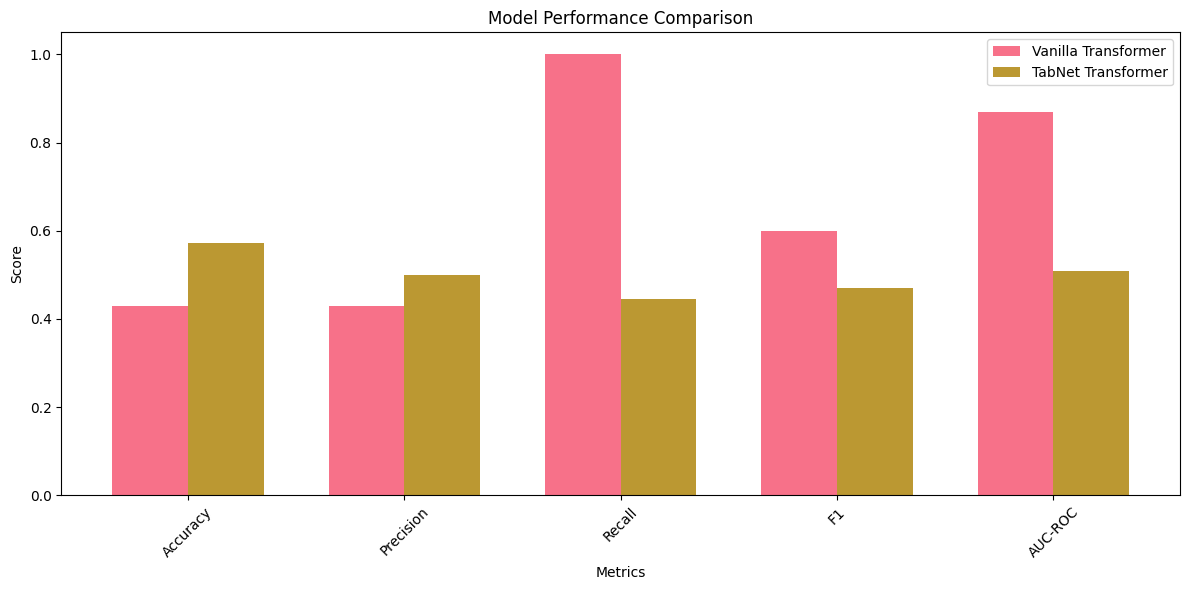

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the style for all visualizations
sns.set_palette("husl")

# Model Performance Comparison
def plot_model_comparison():
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC'],
        'Vanilla Transformer': [0.428571, 0.428571, 1.0, 0.6, 0.870370],
        'TabNet Transformer': [0.571429, 0.5, 0.444444, 0.470588, 0.509259]
    }
    df_metrics = pd.DataFrame(metrics)

    plt.figure(figsize=(12, 6))
    x = np.arange(len(df_metrics['Metric']))
    width = 0.35

    plt.bar(x - width/2, df_metrics['Vanilla Transformer'], width, label='Vanilla Transformer')
    plt.bar(x + width/2, df_metrics['TabNet Transformer'], width, label='TabNet Transformer')

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x, df_metrics['Metric'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_model_comparison()

***SHAP (SHapley Additive exPlanations) analytics***

In [51]:
# !pip install shap
import shap
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

class ModelWrapper:
    """
    A wrapper class that ensures consistent numerical handling for SHAP analysis.
    This wrapper properly processes inputs and outputs to avoid numerical type issues.
    """
    def __init__(self, model):
        self.model = model
        self.model.eval()

    def __call__(self, X):
        # Convert to float32 numpy array first
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(X, list):
            X = np.array(X)

        # Ensure we have float32 type
        X = X.astype(np.float32)

        # Convert to tensor
        X = torch.FloatTensor(X)

        # Add sequence dimension if needed
        if len(X.shape) == 2:
            X = X.unsqueeze(1)

        # Get predictions
        with torch.no_grad():
            output = self.model(X)
            if isinstance(output, tuple):
                output = output[0]

            # Ensure output is the right shape and type
            output = output.view(-1).cpu().numpy()

            # Convert to float32 to ensure numerical stability
            output = output.astype(np.float32)

            # If output is a single number, reshape it
            if len(output.shape) == 0:
                output = output.reshape(1)

        return output

def prepare_data_for_shap(X_train, X_test):
    """
    Prepares data for SHAP analysis by ensuring proper numerical formatting.

    Args:
        X_train: Training data
        X_test: Test data

    Returns:
        Processed versions of X_train and X_test
    """
    # Convert to numpy arrays if needed
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values

    # Ensure float32 type
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, scaler

def run_shap_analysis(model, X_train, X_test, feature_names):
    """
    Runs SHAP analysis with careful numerical handling.

    Args:
        model: The trained model
        X_train: Training data
        X_test: Test data
        feature_names: List of feature names
    """
    print("Preparing data for SHAP analysis...")

    # Prepare data
    X_train_proc, X_test_proc, scaler = prepare_data_for_shap(X_train, X_test)

    print("Creating SHAP explainer...")

    # Sample background data
    n_background = min(100, len(X_train_proc))
    background_data = shap.sample(X_train_proc, n_background)

    try:
        # Create explainer
        explainer = shap.KernelExplainer(
            ModelWrapper(model),
            background_data,
            link="identity"  # Use identity link for numerical stability
        )

        print("Computing SHAP values...")
        # Compute SHAP values for a subset of test data
        n_explain = min(50, len(X_test_proc))  # Limit samples for efficiency
        explanation = explainer.shap_values(X_test_proc[:n_explain])

        # Convert explanation to correct format
        if isinstance(explanation, list):
            shap_values = explanation[0]
        else:
            shap_values = explanation

        # Create visualizations
        print("\nGenerating SHAP summary plot...")
        plt.figure(figsize=(12, 8))

        # Create summary plot with processed data
        shap.summary_plot(
            shap_values,
            X_test_proc[:n_explain],
            feature_names=feature_names,
            show=False
        )
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()

        # Calculate feature importance
        importance = np.abs(shap_values).mean(0)
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        })
        importance_df = importance_df.sort_values('Importance', ascending=False)

        print("\nTop 10 Most Important Features:")
        print(importance_df.head(10))

        return explainer, shap_values, importance_df

    except Exception as e:
        print(f"An error occurred during SHAP analysis: {str(e)}")
        raise

**SHAP analytics on Vanilla Transformer**

Loading data and the Vanilla Transformer model...
Preparing data for SHAP analysis...
Creating SHAP explainer...
Computing SHAP values...


  0%|          | 0/21 [00:00<?, ?it/s]


Generating SHAP summary plot...


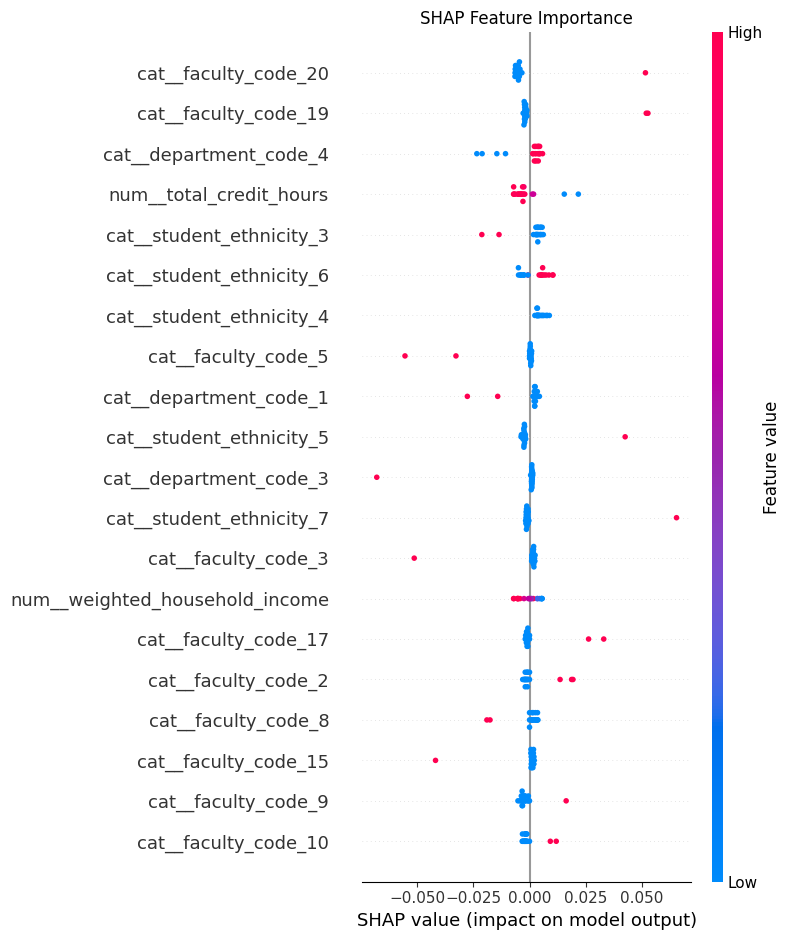


Top 10 Most Important Features:
                     Feature  Importance
21      cat__faculty_code_20    0.007473
20      cat__faculty_code_19    0.006801
25    cat__department_code_4    0.006051
3    num__total_credit_hours    0.005447
28  cat__student_ethnicity_3    0.005262
31  cat__student_ethnicity_6    0.005039
29  cat__student_ethnicity_4    0.004787
7        cat__faculty_code_5    0.004601
23    cat__department_code_1    0.004416
30  cat__student_ethnicity_5    0.004413


In [52]:
def main():
    print("Loading data and the Vanilla Transformer model...")
    try:
        X = np.load('X_combined.npy')
        y = pd.read_csv('y_target.csv')['non-graduation'].values

        X = X.astype(np.float32)

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        feature_names = pd.read_csv('feature_names.csv')['feature_names'].tolist()

        model = VanillaTransformer(input_dim=X.shape[1])

        explainer, shap_values, importance_df = run_shap_analysis(
            model, X_train, X_test, feature_names
        )

        return explainer, shap_values, importance_df

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    explainer, shap_values, importance_df = main()


**SHAP analytics on Tabnet Transfomer**

Loading data and the Tabnet model...
Preparing data for SHAP analysis...
Creating SHAP explainer...
Computing SHAP values...


  0%|          | 0/21 [00:00<?, ?it/s]


Generating SHAP summary plot...


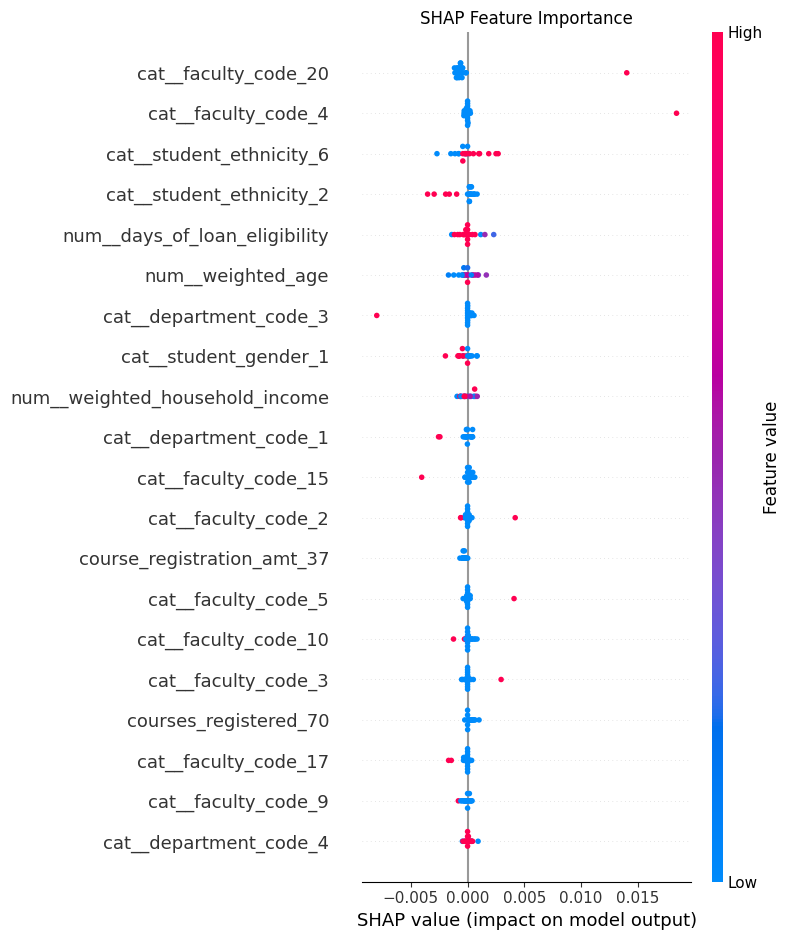


Top 10 Most Important Features:
                           Feature  Importance
21            cat__faculty_code_20    0.001331
6              cat__faculty_code_4    0.000963
31        cat__student_ethnicity_6    0.000884
27        cat__student_ethnicity_2    0.000765
1    num__days_of_loan_eligibility    0.000554
0                num__weighted_age    0.000531
24          cat__department_code_3    0.000503
22           cat__student_gender_1    0.000460
2   num__weighted_household_income    0.000433
23          cat__department_code_1    0.000429


In [53]:
def main():
    print("Loading data and the Tabnet model...")
    try:
        X = np.load('X_combined.npy')
        y = pd.read_csv('y_target.csv')['non-graduation'].values

        X = X.astype(np.float32)

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        feature_names = pd.read_csv('feature_names.csv')['feature_names'].tolist()

        model = TabNetTransformer(input_dim=X.shape[1])

        explainer, shap_values, importance_df = run_shap_analysis(
            model, X_train, X_test, feature_names
        )

        return explainer, shap_values, importance_df

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    explainer, shap_values, importance_df = main()


***LIME Local Interpretable Model-Agnostic Explanations***

In [54]:
# Import necessary libraries
import lime  
import lime.lime_tabular  
import torch  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import pandas as pd  
from sklearn.preprocessing import StandardScaler  

# Wrapper class to make the model compatible with LIME
class ModelWrapper:
    def __init__(self, model):
        """
        Initializes the model wrapper.

        Parameters:
        - model: The PyTorch model to be wrapped.
        """
        self.model = model
        self.model.eval()  # Set model to evaluation mode

    def __call__(self, X):
        """
        Makes the model callable and processes input data before prediction.

        Parameters:
        - X: Input data (can be a Pandas DataFrame, list, or NumPy array).

        Returns:
        - Model predictions as a NumPy array.
        """
        # Convert DataFrame or list to NumPy array if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(X, list):
            X = np.array(X)

        # Ensure input is in float32 format for compatibility with PyTorch
        X = X.astype(np.float32)

        # Convert to PyTorch tensor
        X = torch.FloatTensor(X)

        # Add sequence dimension if needed (for models expecting sequences)
        if len(X.shape) == 2:
            X = X.unsqueeze(1)

        # Get model predictions
        with torch.no_grad():  # Disable gradient computation for efficiency
            output = self.model(X)
            if isinstance(output, tuple):  # Handle tuple outputs (e.g., for multi-task models)
                output = output[0]

            # Convert output tensor to NumPy array
            output = output.view(-1).cpu().numpy()

            # Ensure output is float32 for numerical stability
            output = output.astype(np.float32)

            # Reshape if output is a single value
            if len(output.shape) == 0:
                output = output.reshape(1)

        return output

# Function to prepare data for LIME analysis
def prepare_data_for_lime(X_train, X_test):
    """
    Prepares the dataset for LIME by scaling the features.

    Parameters:
    - X_train: Training dataset (Pandas DataFrame or NumPy array).
    - X_test: Test dataset (Pandas DataFrame or NumPy array).

    Returns:
    - Scaled training data, scaled test data, and the fitted scaler.
    """
    # Convert Pandas DataFrame to NumPy array if necessary
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values

    # Ensure float32 type for numerical stability
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    # Apply standard scaling (zero mean, unit variance)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    return X_train_scaled, X_test_scaled, scaler

# Function to run LIME analysis for model interpretability
def run_lime_analysis(model, X_train, X_test, feature_names):
    """
    Runs LIME analysis on the given model and dataset.

    Parameters:
    - model: The trained PyTorch model.
    - X_train: Training dataset.
    - X_test: Test dataset.
    - feature_names: List of feature names.

    Returns:
    - LIME explainer and explanation instance.
    """
    # Prepare and scale the data for LIME
    X_train_proc, X_test_proc, scaler = prepare_data_for_lime(X_train, X_test)

    print("Creating LIME explainer...")

    # Define a prediction function for LIME
    def predict_fn(X):
        """
        Converts input into tensor, processes it through the model, 
        and returns predictions in a format compatible with LIME.
        """
        X_tensor = torch.FloatTensor(X)

        # Ensure the data is in the correct shape for the model
        if len(X_tensor.shape) == 2:  
            X_tensor = X_tensor.unsqueeze(1)  # Add sequence dimension if required

        # Get model predictions
        output = model(X_tensor).view(-1).detach().numpy()

        return output.reshape(-1, 1)  # Reshape for LIME compatibility

    # Create a LIME explainer for tabular data
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train_proc,
        feature_names=feature_names, 
        class_names=['non-graduation'], 
        mode='regression',
        discretize_continuous=True,  # Ensure better interpretability for continuous features
    )

    # Select a sample to explain (using index 0 for now)
    i = 0  # Modify this index if needed
    explanation = explainer.explain_instance(
        X_train_proc[i],
        predict_fn,  
        num_features=10,  # Adjust number of features displayed
        top_labels=1  # Show only the top label explanation
    )

    # Display explanation with enhanced styling
    print("\nFeature Importance Visualization:")
    explanation.show_in_notebook(show_table=True, show_all=False)
    
    return explainer, explanation

**LIME on Vanilla Transformer**

In [55]:

def main():
    try:
        X = np.load('X_combined.npy')
        y = pd.read_csv('y_target.csv')['non-graduation'].values

        X = X.astype(np.float32)

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        feature_names = pd.read_csv('feature_names.csv')['feature_names'].tolist()

        model = VanillaTransformer(input_dim=X.shape[1])

        explainer, explanation = run_lime_analysis(
            model, X_train, X_test, feature_names
        )

        return explainer, explanation

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    explainer, explanation = main()


Creating LIME explainer...

Feature Importance Visualization:


**LIME on TabNet**

In [56]:
def main():
    try:
        X = np.load('X_combined.npy')
        y = pd.read_csv('y_target.csv')['non-graduation'].values

        X = X.astype(np.float32)

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        feature_names = pd.read_csv('feature_names.csv')['feature_names'].tolist()

        #  TabNet model 
        model = TabNetTransformer(input_dim=X.shape[1])

        explainer, explanation = run_lime_analysis(
            model, X_train, X_test, feature_names
        )

        return explainer, explanation

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    explainer, explanation = main()

Creating LIME explainer...

Feature Importance Visualization:
